In [1]:
import pickle as pk
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import sys
sys.path.append('/Users/hawbecke/Code/Python/')
from mmctools.mmctools.plotting import TaylorDiagram
from scipy.stats import pearsonr

In /Users/hawbecke/.conda/envs/pyhawbeck/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/hawbecke/.conda/envs/pyhawbeck/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/hawbecke/.conda/envs/pyhawbeck/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/hawbecke/.conda/envs/pyhawbeck/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


In [2]:
f_dir = '/Users/hawbecke/Research/MMC/NYSERDA/ensemble_data/'
f_name = 'validation_data.p'
f_f = '{}{}'.format(f_dir,f_name)

In [3]:
nyserda = pk.load(open(f_f,'rb'))

In [4]:
for key in nyserda.keys():
    print(key)

nyserda_E05
nyserda_E06
atlantic_shores


In [5]:
n_levels = 0
lvls = []
for wspd_key in nyserda['nyserda_E05']['obs'].keys():
    if 'windspeed' in wspd_key:
        n_levels += 1
        lvls.append(int(wspd_key.replace('windspeed_','').replace('m','')))

lvls = sorted(lvls)
lvls.remove(2)
n_levels -= 1

n_Tlevels = 0
Tlvls = []
for wspd_key in nyserda['nyserda_E05']['obs'].keys():
    if 'temperature' in wspd_key:
        n_Tlevels += 1
        Tlvls.append(int(wspd_key.replace('temperature_','').replace('m','')))

Tlvls = sorted(Tlvls)
#Tlvls.remove(2)
#print(Tlvls)

In [6]:
nyserda['nyserda_E05']['WPS1_WRF1'].keys()

Index(['boundary_layer_height', 'friction_velocity_2m',
       'inversemoninobukhovlength_2m', 'pressure_0m', 'pressure_100m',
       'pressure_200m', 'pressure_300m', 'relativehumidity_2m',
       'roughness_length', 'skin_temperature', 'surface_heat_flux',
       'surface_sea_temperature', 'temperature_100m', 'temperature_10m',
       'temperature_120m', 'temperature_140m', 'temperature_160m',
       'temperature_180m', 'temperature_200m', 'temperature_20m',
       'temperature_220m', 'temperature_240m', 'temperature_260m',
       'temperature_280m', 'temperature_2m', 'temperature_300m',
       'temperature_400m', 'temperature_40m', 'temperature_500m',
       'temperature_60m', 'temperature_80m', 'winddirection_100m',
       'winddirection_10m', 'winddirection_120m', 'winddirection_140m',
       'winddirection_160m', 'winddirection_180m', 'winddirection_200m',
       'winddirection_20m', 'winddirection_220m', 'winddirection_240m',
       'winddirection_260m', 'winddirection_280m', 'w

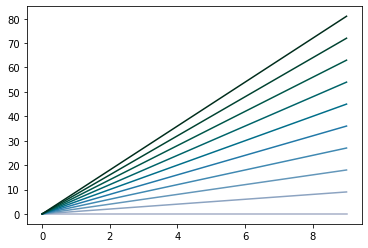

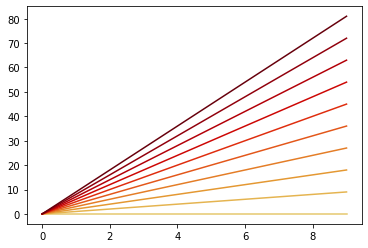

In [7]:
e05_lvl_colors = {}
for ss,lvl in enumerate(lvls):
    line_cols = plt.cm.PuBuGn(np.linspace(0.3,1.0,n_levels))[ss]
    darken = 0.1
    #line_cols = plt.cm.Set1_r(np.linspace(0.4,1.0,len(near_shore_stations)))[ss]
    for tt,col in enumerate(line_cols):
        if tt < 3:
            line_cols[tt] = col - darken
            if line_cols[tt] < 0.0: line_cols[tt] = 0.0
    e05_lvl_colors[lvl] = line_cols
for ss,lvl in enumerate(lvls):
    plt.plot(np.arange(0,10),np.arange(0,10)*ss,c=e05_lvl_colors[lvl])
plt.show()

e06_lvl_colors = {}
for ss,lvl in enumerate(lvls):
    line_cols = plt.cm.YlOrRd(np.linspace(0.2,1.0,n_levels))[ss]
    darken = 0.1
    #line_cols = plt.cm.Set1_r(np.linspace(0.4,1.0,len(near_shore_stations)))[ss]
    for tt,col in enumerate(line_cols):
        if tt < 3:
            line_cols[tt] = col - darken
            if line_cols[tt] < 0.0: line_cols[tt] = 0.0
    e06_lvl_colors[lvl] = line_cols
for ss,lvl in enumerate(lvls):
    plt.plot(np.arange(0,10),np.arange(0,10)*ss,c=e06_lvl_colors[lvl])
plt.show()


In [8]:
wrf_cases = list(nyserda['nyserda_E05'].keys())
wrf_cases.remove('obs')
n_cases = len(wrf_cases)

n_Tlevels = 0
Tlvls = []
for wspd_key in nyserda['nyserda_E05'][wrf_cases[0]].keys():
    if 'temperature_' in wspd_key:
        n_Tlevels += 1
        Tlvls.append(int(wspd_key.replace('temperature_','').replace('m','')))

Tlvls = sorted(Tlvls)
#Tlvls.remove(2)

n_Ulevels = 0
Ulvls = []
for wspd_key in nyserda['nyserda_E05'][wrf_cases[0]].keys():
    if 'windspeed' in wspd_key:
        n_Ulevels += 1
        Ulvls.append(int(wspd_key.replace('windspeed_','').replace('m','')))

Ulvls = sorted(Ulvls)
#lvls.remove(2)
#n_Ulevels -= 1

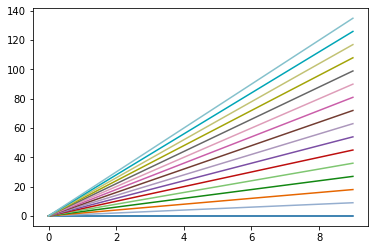

In [9]:
case_colors = {}
for cc,case in enumerate(wrf_cases):
    line_cols = plt.cm.tab20(np.linspace(0.0,1.0,n_cases))[cc]
    darken = 0.1
    #line_cols = plt.cm.Set1_r(np.linspace(0.4,1.0,len(near_shore_stations)))[ss]
    for tt,col in enumerate(line_cols):
        if tt < 3:
            line_cols[tt] = col - darken
            if line_cols[tt] < 0.0: line_cols[tt] = 0.0
    case_colors[case] = line_cols
for cc,case in enumerate(wrf_cases):
    plt.plot(np.arange(0,10),np.arange(0,10)*cc,c=case_colors[case])
plt.show()

In [10]:
ds_start = '2019-09-01 00:00:00'
ds_end   = '2020-08-31 23:50:00'
for ww,wrf_case in enumerate(wrf_cases):
    e05m_df = nyserda['nyserda_E05'][wrf_case].loc[ds_start:ds_end]
    e06m_df = nyserda['nyserda_E06'][wrf_case].loc[ds_start:ds_end]


    wrf_times = e05m_df.index.values
    n_times = len(wrf_times)

    wrf_e05U_i   = np.zeros((len(wrf_times),n_Ulevels))
    wrf_e06U_i   = np.zeros((len(wrf_times),n_Ulevels))

    wrf_e05T_i   = np.zeros((len(wrf_times),n_Tlevels))
    wrf_e06T_i   = np.zeros((len(wrf_times),n_Tlevels))

    
    for ll,lvl in enumerate(Ulvls):
        wrf_e05U_i[:,ll] = e05m_df['windspeed_{}m'.format(lvl)]
        wrf_e06U_i[:,ll] = e06m_df['windspeed_{}m'.format(lvl)]
    for ll,lvl in enumerate(Tlvls):
        wrf_e05T_i[:,ll] = e05m_df['temperature_{}m'.format(lvl)]
        wrf_e06T_i[:,ll] = e06m_df['temperature_{}m'.format(lvl)]
    
    Uda5 = xr.DataArray(wrf_e05U_i, coords=[wrf_times,Ulvls], dims=['datetime','Ulevels'],
                       name='wspd').expand_dims({'case':[wrf_case],'lidar':['E05']})
    Tda5 = xr.DataArray(wrf_e05T_i+273.15, coords=[wrf_times,Tlvls], dims=['datetime','Tlevels'],
                       name='T').expand_dims({'case':[wrf_case],'lidar':['E05']})

    Uda6 = xr.DataArray(wrf_e06U_i, coords=[wrf_times,Ulvls], dims=['datetime','Ulevels'],
                       name='wspd').expand_dims({'case':[wrf_case],'lidar':['E06']})
    Tda6 = xr.DataArray(wrf_e06T_i+273.15, coords=[wrf_times,Tlvls], dims=['datetime','Tlevels'],
                       name='T').expand_dims({'case':[wrf_case],'lidar':['E06']})
    
    sst5 = xr.DataArray(e05m_df.surface_sea_temperature+273.15,coords=[wrf_times],dims=['datetime'],
                       name='sst').expand_dims({'case':[wrf_case],'lidar':['E05']})
    
    sst6 = xr.DataArray(e06m_df.surface_sea_temperature+273.15,coords=[wrf_times],dims=['datetime'],
                       name='sst').expand_dims({'case':[wrf_case],'lidar':['E06']})

    hum5 = xr.DataArray(e05m_df.relativehumidity_2m,coords=[wrf_times],dims=['datetime'],
                       name='relh').expand_dims({'case':[wrf_case],'lidar':['E05']})
    
    hum6 = xr.DataArray(e06m_df.relativehumidity_2m,coords=[wrf_times],dims=['datetime'],
                       name='relh').expand_dims({'case':[wrf_case],'lidar':['E06']})

    ds = xr.merge([Uda5,Tda5,sst5,hum5,
                   Uda6,Tda6,sst6,hum6])
    if ww == 0:
        ds_f = ds.copy()
    else:
        ds_f = xr.merge([ds_f,ds])

e05m_df = nyserda['nyserda_E05']['obs'].loc[ds_start:ds_end].tz_convert(None).reindex(pd.date_range(ds_start,ds_end,freq='10min'))
e06m_df = nyserda['nyserda_E06']['obs'].loc[ds_start:ds_end].tz_convert(None).reindex(pd.date_range(ds_start,ds_end,freq='10min'))

obs_time = e05m_df.index
n_times = len(obs_time)

obs_times = obs_time.values
wrf_e05U_o   = np.zeros((len(obs_times),n_levels))
wrf_e06U_o   = np.zeros((len(obs_times),n_levels))

for ll,lvl in enumerate(lvls):
    wrf_e05U_o[:,ll] = e05m_df['windspeed_{}m'.format(lvl)]#
    wrf_e06U_o[:,ll] = e06m_df['windspeed_{}m'.format(lvl)]#.reindex(pd.date_range(case_start,case_end,freq='10min'))


Uda5 = xr.DataArray(wrf_e05U_o, coords=[wrf_times,lvls], dims=['datetime','Ulevels'],
                   name='wspd').expand_dims({'case':['obs'],'lidar':['E05']})

Uda6 = xr.DataArray(wrf_e06U_o, coords=[wrf_times,lvls], dims=['datetime','Ulevels'],
                   name='wspd').expand_dims({'case':['obs'],'lidar':['E06']})

t2m5 = xr.DataArray(e05m_df.temperature_2m,coords=[wrf_times],dims=['datetime'],
                   name='T').expand_dims({'case':['obs'],'lidar':['E05'],'Tlevels':[2]})

t2m6 = xr.DataArray(e06m_df.temperature_2m,coords=[wrf_times],dims=['datetime'],
                   name='T').expand_dims({'case':['obs'],'lidar':['E06'],'Tlevels':[2]})

sst5 = xr.DataArray(e05m_df.sst,coords=[wrf_times],dims=['datetime'],
                   name='sst').expand_dims({'case':['obs'],'lidar':['E05']})

sst6 = xr.DataArray(e06m_df.sst,coords=[wrf_times],dims=['datetime'],
                   name='sst').expand_dims({'case':['obs'],'lidar':['E06']})

ods = xr.merge([Uda5,t2m5,sst5,
                Uda6,t2m6,sst6])


lid_ds = ds_f.combine_first(ods)

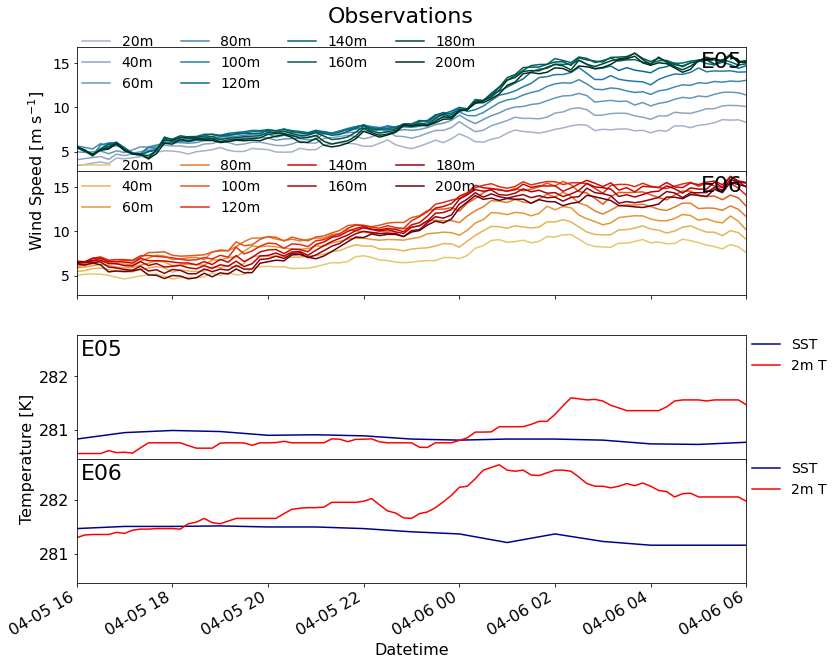

In [11]:
case_num = 8


n_profiles = 7
if case_num == 1:
    case_start = '2020-02-04 19:30:00'
    case_end   = '2020-02-05 07:30:00'
    best_case  = 'WPS1_WRF4'
elif case_num == 2:
    case_start = '2020-04-07 00:30:00'
    case_end   = '2020-04-07 06:30:00'
    best_case  = 'WPS2_WRF2'
    leg_ax     = 1
elif case_num == 3: # Missing e06 data
    case_start = '2020-05-02 18:00:00'
    case_end   = '2020-05-03 06:00:00'
elif case_num == 4:
    case_start = '2019-09-12 14:00:00'
    case_end   = '2019-09-12 20:00:00'
    best_case  = 'WPS1_WRF2'
elif case_num == 5: # SAME AS CASE #1
    case_start = '2020-02-04 14:30:00'
    case_end   = '2020-02-05 12:30:00'
    best_case  = 'WPS1_WRF4'
elif case_num == 6:
    case_start = '2020-03-03 14:30:00'
    case_end   = '2020-03-03 20:30:00'
    best_case  = 'WPS4_WRF4'
elif case_num == 7:
    case_start = '2020-04-05 16:00:00'
    case_end   = '2020-04-05 22:00:00'
    best_case  = 'WPS4_WRF4'
elif case_num == 8:
    case_start = '2020-04-05 16:00:00'
    case_end   = '2020-04-06 06:00:00'
    best_case  = 'WPS3_WRF1'
    n_profiles = 8


fig = plt.figure(figsize=(12,8),constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=1, bottom=0.55, top=0.98,
                       hspace=0.0)
e05_u = fig.add_subplot(gs1[0])
e06_u = fig.add_subplot(gs1[1],sharex=e05_u)

lid_ds_case = lid_ds.sel(datetime=slice(case_start,case_end))

for dd,lid in enumerate(lid_ds.lidar.data):
    if dd == 0:
        ax = e05_u
        colors = e05_lvl_colors
    else:
        ax = e06_u
        colors = e06_lvl_colors

    for lvl in Ulvls:
        if lvl in lvls:
            wspd = lid_ds_case.wspd.sel(lidar=lid,Ulevels=lvl,case='obs').plot(ax=ax,c=colors[lvl],label='{}m'.format(lvl))

miny,maxy = min([e05_u.get_ylim()[0],e06_u.get_ylim()[0]]),max([e05_u.get_ylim()[1],e06_u.get_ylim()[1]])
if miny < 1.0: miny = max([e05_u.get_ylim()[0],e06_u.get_ylim()[0]])
e05_u.set_ylim(miny,maxy)
e06_u.set_ylim(miny,maxy)
txt_y = 0.96*(maxy-miny) + miny
e05_u.text(pd.to_datetime(case_end) - pd.to_timedelta(5,'min'),txt_y,'E05',va='top',ha='right',size=22)
e06_u.text(pd.to_datetime(case_end) - pd.to_timedelta(5,'min'),txt_y,'E06',va='top',ha='right',size=22)

    

    
e05_u.set_title('')
e06_u.set_title('')
e05_u.legend(frameon=False,fontsize=14,loc=(0.0,0.60),ncol=n_levels-6)
e06_u.legend(frameon=False,fontsize=14,loc=(0.0,0.60),ncol=n_levels-6)
e05_u.set_xlim(case_start,case_end)
#e06_u.set_xticks(xticks)
e05_u.tick_params(labelsize=14,labelbottom=False)
e06_u.tick_params(labelsize=14,labelbottom=False)
e05_u.set_ylabel('Wind Speed [m s$^{-1}$]',size=16,y=0.0)
e06_u.set_ylabel('',size=16,y=0.0)
e06_u.set_xlabel('',size=16)



gs2 = fig.add_gridspec(nrows=2, ncols=1, bottom=0.05, top=0.48,
                        hspace=0.0)
e05_T = fig.add_subplot(gs2[0])
e06_T = fig.add_subplot(gs2[1],sharex=e05_T,sharey=e05_T)


for dd,lid in enumerate(lid_ds.lidar.data):
    if dd == 0:
        ax = e05_T
    else:
        ax = e06_T

    lid_ds_case.sst.sel(lidar=lid,case='obs').plot(ax=ax,ls='-',c='darkblue',label='SST')
    lid_ds_case.T.sel(lidar=lid,Tlevels=2,case='obs').plot(ax=ax,ls='-',c='red',label='2m T')


miny,maxy = e05_T.get_ylim()
txt_y = 0.96*(maxy-miny) + miny

e05_T.text(pd.to_datetime(case_start) + pd.to_timedelta(5,'min'),txt_y,'E05',va='top',size=22)
e06_T.text(pd.to_datetime(case_start) + pd.to_timedelta(5,'min'),txt_y,'E06',va='top',size=22)
e05_T.set_title('')
e06_T.set_title('')
e05_T.legend(frameon=False,fontsize=14,loc=(1.0,0.65))
e06_T.legend(frameon=False,fontsize=14,loc=(1.0,0.65))
e05_T.set_xlim(case_start,case_end)
e05_T.tick_params(labelsize=16,labelbottom=False)
e06_T.tick_params(labelsize=16)
e05_T.set_ylabel('Temperature [K]',size=16,y=0.0)
e06_T.set_ylabel('',size=16,y=0.0)
e06_T.set_xlabel('Datetime',size=16)
plt.suptitle('Observations',y=1.05,size=22)
plt.show()

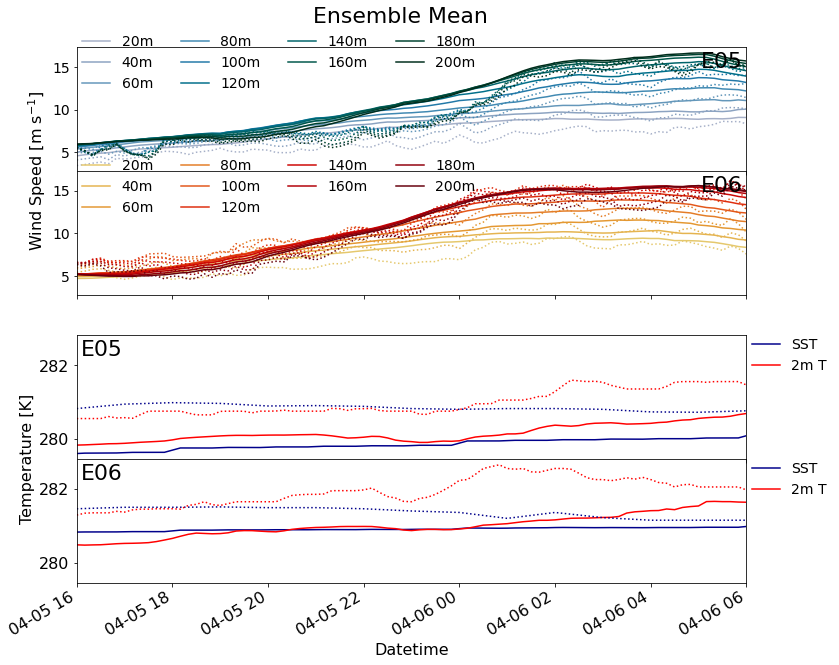

In [12]:
fig = plt.figure(figsize=(12,8),constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=1, bottom=0.55, top=0.98,
                       hspace=0.0)
e05_u = fig.add_subplot(gs1[0])
e06_u = fig.add_subplot(gs1[1],sharex=e05_u,sharey=e05_u)

lid_ds_case = lid_ds.sel(datetime=slice(case_start,case_end))

for dd,lid in enumerate(lid_ds.lidar.data):
    if dd == 0:
        ax = e05_u
        colors = e05_lvl_colors
    else:
        ax = e06_u
        colors = e06_lvl_colors

    for lvl in Ulvls:
        if lvl in lvls:
            u_plt = lid_ds_case.wspd.sel(lidar=lid,Ulevels=lvl).mean(axis=0).plot(ax=ax,label='{}m'.format(lvl),c=colors[lvl])
            wspd = lid_ds_case.wspd.sel(lidar=lid,Ulevels=lvl,case='obs').plot(ax=ax,c=colors[lvl],ls=':')#,label='{}m'.format(lvl))

miny,maxy = min([e05_u.get_ylim()[0],e06_u.get_ylim()[0]]),max([e05_u.get_ylim()[1],e06_u.get_ylim()[1]])
if miny < 1.0: miny = max([e05_u.get_ylim()[0],e06_u.get_ylim()[0]])
e05_u.set_ylim(miny,maxy)
e06_u.set_ylim(miny,maxy)
txt_y = 0.96*(maxy-miny) + miny
e05_u.text(pd.to_datetime(case_end) - pd.to_timedelta(5,'min'),txt_y,'E05',va='top',ha='right',size=22)
e06_u.text(pd.to_datetime(case_end) - pd.to_timedelta(5,'min'),txt_y,'E06',va='top',ha='right',size=22)

   
    

    
e05_u.set_title('')
e06_u.set_title('')
e05_u.legend(frameon=False,fontsize=14,loc=(0.0,0.60),ncol=n_levels-6)
e06_u.legend(frameon=False,fontsize=14,loc=(0.0,0.60),ncol=n_levels-6)
e05_u.set_xlim(case_start,case_end)
#e06_u.set_xticks(xticks)
e05_u.tick_params(labelsize=14,labelbottom=False)
e06_u.tick_params(labelsize=14,labelbottom=False)
e05_u.set_ylabel('Wind Speed [m s$^{-1}$]',size=16,y=0.0)
e06_u.set_ylabel('',size=16,y=0.0)
e06_u.set_xlabel('',size=16)



gs2 = fig.add_gridspec(nrows=2, ncols=1, bottom=0.05, top=0.48,
                        hspace=0.0)
e05_T = fig.add_subplot(gs2[0])
e06_T = fig.add_subplot(gs2[1],sharex=e05_T,sharey=e05_T)


for dd,lid in enumerate(lid_ds.lidar.data):
    if dd == 0:
        ax = e05_T
    else:
        ax = e06_T
    sst_plt = lid_ds_case.sst.sel(lidar=lid).mean(axis=0).plot(ax=ax,label='SST',c='darkblue')
    T2m_plt = lid_ds_case.T.sel(lidar=lid,Tlevels=2).mean(axis=0).plot(ax=ax,label='2m T',c='red')
    lid_ds_case.sst.sel(lidar=lid,case='obs').plot(ax=ax,ls=':',c='darkblue')#,label='SST')
    lid_ds_case.T.sel(lidar=lid,Tlevels=2,case='obs').plot(ax=ax,ls=':',c='red')#,label='2m T')
#(e05m_df.surface_sea_temperature+273.15).plot(ax=e05_T,label='SST')
#(e05m_df.temperature_2m+273.15).plot(ax=e05_T,label='2m T')
#(e06m_df.surface_sea_temperature+273.15).plot(ax=e06_T,label='SST')
#(e06m_df.temperature_2m+273.15).plot(ax=e06_T,label='2m T')


miny,maxy = e05_T.get_ylim()
txt_y = 0.96*(maxy-miny) + miny

e05_T.text(pd.to_datetime(case_start) + pd.to_timedelta(5,'min'),txt_y,'E05',va='top',size=22)
e06_T.text(pd.to_datetime(case_start) + pd.to_timedelta(5,'min'),txt_y,'E06',va='top',size=22)
e05_T.set_title('')
e06_T.set_title('')
e05_T.legend(frameon=False,fontsize=14,loc=(1.0,0.65))
e06_T.legend(frameon=False,fontsize=14,loc=(1.0,0.65))
e05_T.set_xlim(case_start,case_end)
e05_T.tick_params(labelsize=16,labelbottom=False)
e06_T.tick_params(labelsize=16)
e05_T.set_ylabel('Temperature [K]',size=16,y=0.0)
e06_T.set_ylabel('',size=16,y=0.0)
e06_T.set_xlabel('Datetime',size=16)
plt.suptitle('Ensemble Mean',y=1.05,size=22)
plt.show()

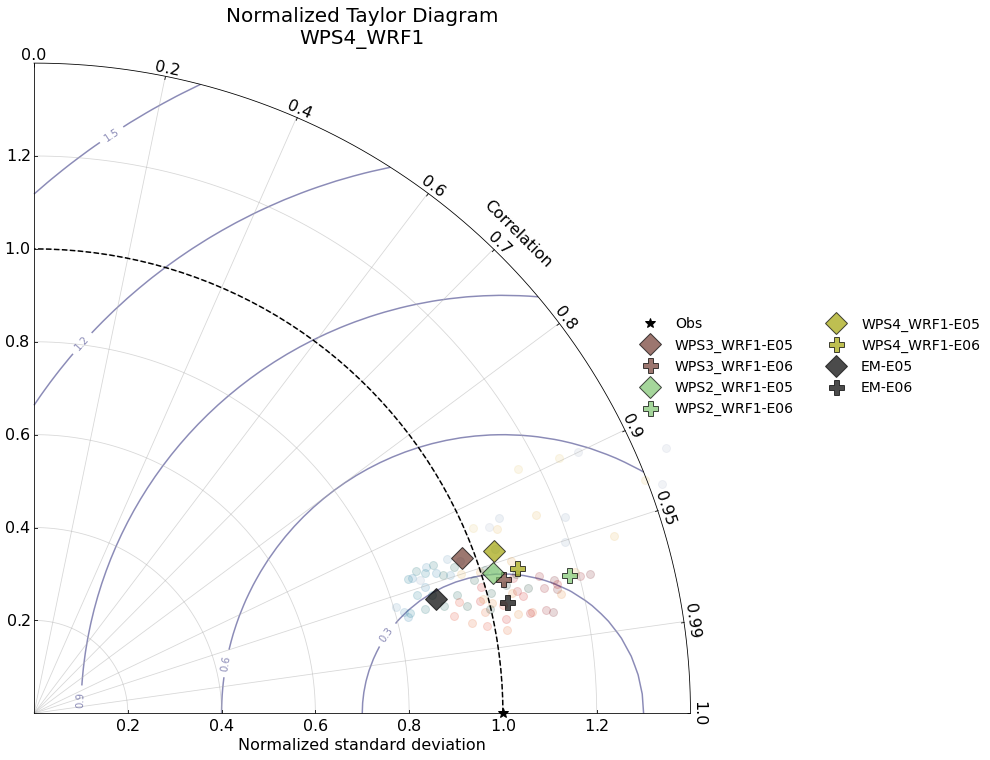

In [13]:
extend = False
TD_max_r = 1.4
fig = plt.figure(figsize=(12,12.2))
dia = TaylorDiagram(1.0, fig=fig, 
                    extend=extend,
                    rect=111,
                    label='Obs',
                    normalize=True,
                    srange=[0.0,TD_max_r],
                    stdevticks=np.arange(0.2,5.6,0.2),
                    labelsize=16)
td_stats = {}
ensemble_mean = True

subset_cases = ['WPS3_WRF1','WPS2_WRF1','WPS4_WRF1']

#for cc,case in enumerate(wrf_cases):
for cc,case in enumerate(subset_cases):
    for lid in ['E05','E06']:
        if lid == 'E05':
            colors = e05_lvl_colors
            mean_m = 'D'
        else:
            colors = e06_lvl_colors
            mean_m = 'P'



        td_stats[case] = pd.DataFrame(index=lvls, columns=['std_norm','R2'], dtype=float) 

        for ll,lvl in enumerate(lvls):

            obs = lid_ds_case.wspd.sel(lidar=lid,case='obs',Ulevels=lvl).copy()
            obs_nan = obs/obs
            sim = lid_ds_case.wspd.sel(lidar=lid,case=case,Ulevels=lvl).copy()
            sim *= obs_nan

            obs = obs.dropna(how='any',dim='datetime')
            sim = sim.dropna(how='any',dim='datetime')
            if len(obs) == 0:
                ref_std = np.nan
                sim_std = np.nan
                r2 = np.nan
            else:
                ref_std = np.std(obs.data)
                sim_std = np.std(sim.data)
                r2,_ = pearsonr(sim, obs)

            if ll == 0: 
                obs_full = obs - np.nanmean(obs)
                sim_full = sim - np.nanmean(sim)
                #label_str = '_'.join(case.replace('_KF','').split('_')[1:])
                label_str = None
            else:
                obs_full = np.concatenate([obs_full,obs - np.nanmean(obs)])
                sim_full = np.concatenate([sim_full,sim - np.nanmean(sim)])
                label_str = None

            marker_c = colors[lvl]
            marker_e = colors[lvl]

            td_stats[case].loc[lvl,'std_norm'] = sim_std/ref_std
            td_stats[case].loc[lvl,'R2'] = r2

            dia.set_ref(ref_std)

            dia.add_sample(np.std(sim.data), r2,
                           marker='o', ms=8, ls='',
                           mfc=marker_c, mec=marker_e, # Colors
                           label=label_str,
                           zorder=cc,alpha=0.15)
      
        td_stats[case]['angle'] = np.arccos(td_stats[case]['R2'])
        td_mean = td_stats[case].mean(axis=0)
        dia.add_sample(td_mean['std_norm'], np.cos(td_mean['angle']),
               norm=False, # don't normalize this point
               marker=mean_m, ms=15, ls='',
               mfc=case_colors[case], mec='k', # Colors
               label='{}-{}'.format(case,lid),
               zorder=cc+3,alpha=0.7)

if ensemble_mean:
    for lid in ['E05','E06']:
        if lid == 'E05':
            colors = e05_lvl_colors
            mean_m = 'D'
        else:
            colors = e06_lvl_colors
            mean_m = 'P'
        td_stats[case] = pd.DataFrame(index=lvls, columns=['std_norm','R2'], dtype=float) 

        for ll,lvl in enumerate(lvls):

            obs = lid_ds_case.wspd.sel(lidar=lid,case='obs',Ulevels=lvl).copy()
            obs_nan = obs/obs
            sim = lid_ds_case.wspd.sel(lidar=lid,Ulevels=lvl).mean(axis=0).copy()
            sim *= obs_nan
            obs = obs.dropna(how='any',dim='datetime')
            sim = sim.dropna(how='any',dim='datetime')
            
            if len(obs) == 0:
                ref_std = np.nan
                sim_std = np.nan
                r2 = np.nan
            else:
                ref_std = np.std(obs.data)
                sim_std = np.std(sim.data)
                r2,_ = pearsonr(sim, obs)
                
            if ll == 0: 
                obs_full = obs - np.nanmean(obs)
                sim_full = sim - np.nanmean(sim)
                #label_str = '_'.join(case.replace('_KF','').split('_')[1:])
                label_str = None
            else:
                obs_full = np.concatenate([obs_full,obs - np.nanmean(obs)])
                sim_full = np.concatenate([sim_full,sim - np.nanmean(sim)])
                label_str = None

            marker_c = colors[lvl]
            marker_e = colors[lvl]

            td_stats[case].loc[lvl,'std_norm'] = sim_std/ref_std
            td_stats[case].loc[lvl,'R2'] = r2

            dia.set_ref(ref_std)

            dia.add_sample(np.std(sim.data), r2,
                           marker='o', ms=8, ls='',
                           mfc=marker_c, mec=marker_e, # Colors
                           label=label_str,
                           zorder=cc,alpha=0.15)
            
        td_stats[case]['angle'] = np.arccos(td_stats[case]['R2'])
        td_mean = td_stats[case].mean(axis=0)
        dia.add_sample(td_mean['std_norm'], np.cos(td_mean['angle']),
               norm=False, # don't normalize this point
               marker=mean_m, ms=15, ls='',
               mfc='k', mec='k', # Colors
               label='EM-{}'.format(lid),
               zorder=cc+3,alpha=0.7)            

contours = dia.add_contours(levels=5, colors='midnightblue',alpha=0.50,zorder=1)
dia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
dia.add_grid(alpha=0.5)
plt.legend(frameon=False,fontsize=14,loc=(0.9,0.45),ncol=2)
plt.title('Normalized Taylor Diagram\n{}'.format(case),size=20,y=1.01)
#plt.text(-0.03,1.49,'f.)',size=16,ha='right')
#figname = '{}Inland_delT_TD'.format(save_dir)
#if save_figs:
#    plt.savefig('{}.png'.format(figname), bbox_inches = 'tight',pad_inches = 0.1)
#    plt.savefig('{}.pdf'.format(figname), bbox_inches = 'tight',pad_inches = 0.1)
#    print(figname)
plt.show()

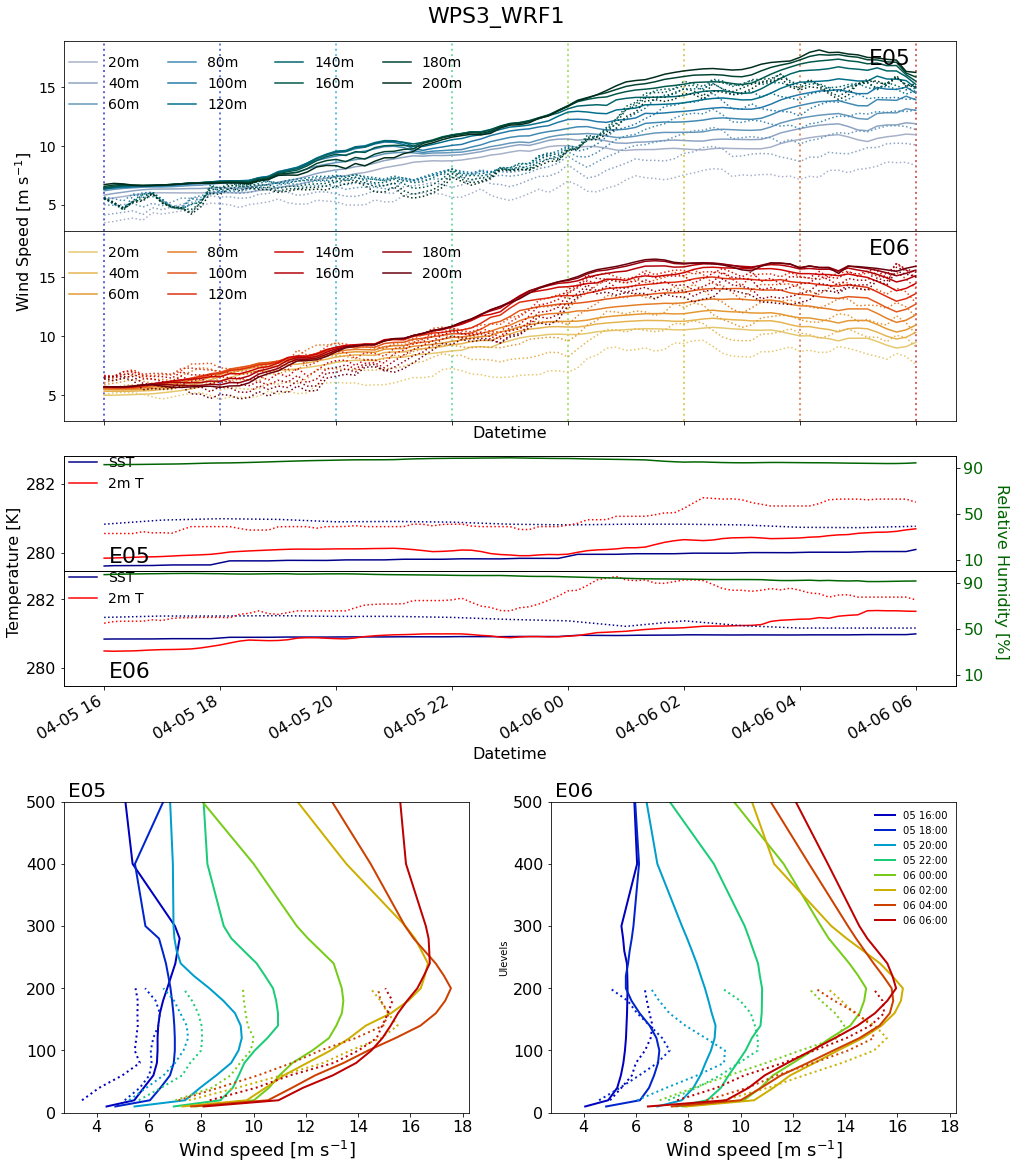

In [14]:
profile_times = pd.date_range(case_start,case_end,periods=n_profiles)
#n_profiles = len(profile_times)
time_colors = {}
for pp,pt in enumerate(profile_times):
    line_cols = plt.cm.jet(np.linspace(0.10,0.9,n_profiles))[pp]
    darken = 0.2
    #line_cols = plt.cm.Set1_r(np.linspace(0.4,1.0,len(near_shore_stations)))[ss]
    for tt,col in enumerate(line_cols):
        if tt < 3:
            line_cols[tt] = col - darken
            if line_cols[tt] < 0.0: line_cols[tt] = 0.0
    time_colors[pt] = line_cols
#for pp,pt in enumerate(profile_times):
#    plt.plot(np.arange(0,10),np.arange(0,10)*pp,c=time_colors[pt])
#plt.show()

fig = plt.figure(figsize=(16,16),constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=1, bottom=0.65, top=0.98,
                       hspace=0.0)
e05_u = fig.add_subplot(gs1[0])
e06_u = fig.add_subplot(gs1[1],sharex=e05_u,sharey=e05_u)

for dd,lid in enumerate(ds_f.lidar.data):
    if dd == 0:
        ax = e05_u
        colors = e05_lvl_colors
    else:
        ax = e06_u
        colors = e06_lvl_colors

    for lvl in Ulvls:
        if lvl in lvls:
            u_plt = lid_ds_case.wspd.sel(lidar=lid,case=best_case).sel(Ulevels=lvl).plot(ax=ax,label='{}m'.format(lvl),c=colors[lvl])
            lid_ds_case.wspd.sel(lidar=lid,Ulevels=lvl,case='obs').plot(ax=ax,c=colors[lvl],ls=':')
miny,maxy = e05_u.get_ylim()
txt_y = 0.96*(maxy-miny) + miny
e05_u.text(pd.to_datetime(case_end) - pd.to_timedelta(5,'min'),txt_y,'E05',va='top',ha='right',size=22)
e06_u.text(pd.to_datetime(case_end) - pd.to_timedelta(5,'min'),txt_y,'E06',va='top',ha='right',size=22)

e05_u.set_title('')
e06_u.set_title('')
e05_u.legend(frameon=False,fontsize=14,loc=(0.0,0.60),ncol=n_levels-6)
e06_u.legend(frameon=False,fontsize=14,loc=(0.0,0.60),ncol=n_levels-6)
#e05_u.set_xlim(case_start,case_end)
e05_u.tick_params(labelsize=14,labelbottom=False)
e06_u.tick_params(labelsize=14,labelbottom=False)
e05_u.set_ylabel('Wind Speed [m s$^{-1}$]',size=16,y=0.0)
e06_u.set_ylabel('',size=16,y=0.0)
e06_u.set_xlabel('Datetime',size=16)
for pt in profile_times:
    e05_u.axvline(pt,0,100,lw=2.0,ls=':',c=time_colors[pt],alpha=0.6,zorder=0)
    e06_u.axvline(pt,0,100,lw=2.0,ls=':',c=time_colors[pt],alpha=0.6,zorder=0)


gs2 = fig.add_gridspec(nrows=2, ncols=1, bottom=0.42, top=0.62,
                        hspace=0.0)
e05_T = fig.add_subplot(gs2[0])
e06_T = fig.add_subplot(gs2[1],sharex=e05_T,sharey=e05_T)


for dd,lid in enumerate(ds_f.lidar.data):
    if dd == 0:
        ax = e05_T
    else:
        ax = e06_T
    sst_plt = lid_ds_case.sst.sel(lidar=lid).mean(axis=0).plot(ax=ax,label='SST',c='darkblue')
    T2m_plt = lid_ds_case.T.sel(lidar=lid,Tlevels=2).mean(axis=0).plot(ax=ax,label='2m T',c='red')
    lid_ds_case.sst.sel(lidar=lid,case='obs').plot(ax=ax,ls=':',c='darkblue')
    lid_ds_case.T.sel(lidar=lid,Tlevels=2,case='obs').plot(ax=ax,ls=':',c='red')
#(e05m_df.surface_sea_temperature+273.15).plot(ax=e05_T,label='SST')
#(e05m_df.temperature_2m+273.15).plot(ax=e05_T,label='2m T')
#(e06m_df.surface_sea_temperature+273.15).plot(ax=e06_T,label='SST')
#(e06m_df.temperature_2m+273.15).plot(ax=e06_T,label='2m T')

e05_q = e05_T.twinx()
e06_q = e06_T.twinx()

for dd,lid in enumerate(ds_f.lidar.data):
    if dd == 0:
        ax = e05_q
    else:
        ax = e06_q
    lid_ds_case.relh.sel(lidar=lid).mean(axis=0).plot(ax=ax,label='RH',c='darkgreen')
    
miny,maxy = e05_T.get_ylim()
txt_y = 0.04*(maxy-miny) + miny


e05_T.text(pd.to_datetime(case_start) + pd.to_timedelta(5,'min'),txt_y,'E05',va='bottom',size=22)
e06_T.text(pd.to_datetime(case_start) + pd.to_timedelta(5,'min'),txt_y,'E06',va='bottom',size=22)
e05_T.set_title('')
e06_T.set_title('')
e05_T.legend(frameon=False,fontsize=14,loc=(0.0,0.65))
e06_T.legend(frameon=False,fontsize=14,loc=(0.0,0.65))
#e05_T.set_xlim(case_start,case_end)
e05_T.tick_params(labelsize=16,labelbottom=False)
e06_T.tick_params(labelsize=16)
e05_T.set_ylabel('Temperature [K]',size=16,y=0.0)
e06_T.set_ylabel('',size=16,y=0.0)
e06_T.set_xlabel('Datetime',size=16)
#plt.show()


e05_q.set_yticks([10,50,90])
e06_q.set_yticks([10,50,90])
e05_q.set_ylim(0,100)
e06_q.set_ylim(0,100)
e05_q.set_title('')
e06_q.set_title('')
e05_q.tick_params(labelsize=16,labelbottom=False,labelcolor='darkgreen')
e06_q.tick_params(labelsize=16,labelcolor='darkgreen')
e05_q.set_ylabel('Relative Humidity [%]',size=16,y=0.0,rotation=270,labelpad=25,color='darkgreen')
e06_q.set_ylabel('',size=16,y=0.0)


gs3 = fig.add_gridspec(nrows=1, ncols=2, bottom=0.05, top=0.32,hspace=0.0)
e05_P = fig.add_subplot(gs3[0])
e06_P = fig.add_subplot(gs3[1],sharex=e05_P,sharey=e05_P)

#best_case = 'WPS2_WRF2'
#fig,ax = plt.subplots(ncols=2,figsize=(12,8),sharex=True,sharey=True)
for ll,lid in enumerate(lid_ds_case.lidar):
    if ll == 0:
        ax = e05_P
    else:
        ax = e06_P
    for pt in profile_times:
        u_plt = lid_ds_case.wspd.sel(lidar=lid,case=best_case).sel(datetime=pt).plot(
            y='Ulevels',ax=ax,c=time_colors[pt],lw=2.0,label='{0:02d} {1:02d}:{2:02d}'.format(pt.day,pt.hour,pt.minute))
        u_plt = lid_ds_case.wspd.sel(lidar=lid,case='obs').sel(datetime=pt).plot(
            y='Ulevels',ax=ax,ls=':',c=time_colors[pt],lw=2.0)
    #lid_ds_case.wspd.sel(lidar=lid,Ulevels=lvl,case='obs').plot(ax=ax,c=colors[lvl],ls=':')
    ax.tick_params(labelsize=16)
    ax.set_xlabel('Wind speed [m s$^{-1}$]',size=18)
    ax.set_ylim(0,500)
    xmin,xmax = ax.get_xlim()
    ax.text(xmin + 0.01*(xmax-xmin),502,str(lid.data),va='bottom',size=20)
    ax.set_title('')
e05_P.set_ylabel('Height',size=18)
e06_P.legend(frameon=False)
e05_P.set_ylabel('')
plt.suptitle(best_case,y=1.01,size=22)

plt.show()

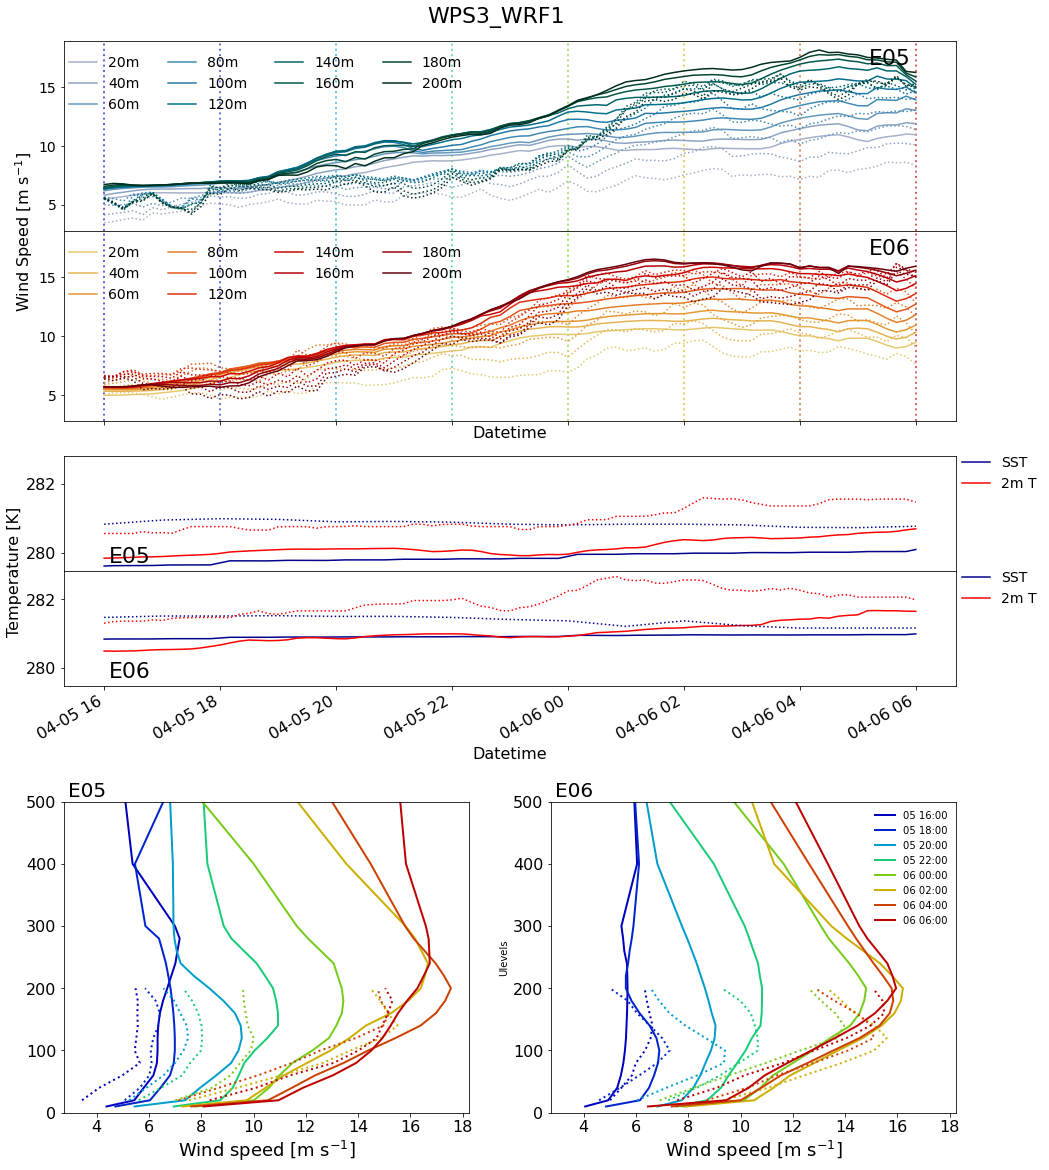

In [15]:
profile_times = pd.date_range(case_start,case_end,periods=n_profiles)
#n_profiles = len(profile_times)
time_colors = {}
for pp,pt in enumerate(profile_times):
    line_cols = plt.cm.jet(np.linspace(0.10,0.9,n_profiles))[pp]
    darken = 0.2
    #line_cols = plt.cm.Set1_r(np.linspace(0.4,1.0,len(near_shore_stations)))[ss]
    for tt,col in enumerate(line_cols):
        if tt < 3:
            line_cols[tt] = col - darken
            if line_cols[tt] < 0.0: line_cols[tt] = 0.0
    time_colors[pt] = line_cols
#for pp,pt in enumerate(profile_times):
#    plt.plot(np.arange(0,10),np.arange(0,10)*pp,c=time_colors[pt])
#plt.show()

fig = plt.figure(figsize=(16,16),constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=1, bottom=0.65, top=0.98,
                       hspace=0.0)
e05_u = fig.add_subplot(gs1[0])
e06_u = fig.add_subplot(gs1[1],sharex=e05_u,sharey=e05_u)

for dd,lid in enumerate(ds_f.lidar.data):
    if dd == 0:
        ax = e05_u
        colors = e05_lvl_colors
    else:
        ax = e06_u
        colors = e06_lvl_colors

    for lvl in Ulvls:
        if lvl in lvls:
            u_plt = lid_ds_case.wspd.sel(lidar=lid,case=best_case).sel(Ulevels=lvl).plot(ax=ax,label='{}m'.format(lvl),c=colors[lvl])
            lid_ds_case.wspd.sel(lidar=lid,Ulevels=lvl,case='obs').plot(ax=ax,c=colors[lvl],ls=':')
miny,maxy = e05_u.get_ylim()
txt_y = 0.96*(maxy-miny) + miny
e05_u.text(pd.to_datetime(case_end) - pd.to_timedelta(5,'min'),txt_y,'E05',va='top',ha='right',size=22)
e06_u.text(pd.to_datetime(case_end) - pd.to_timedelta(5,'min'),txt_y,'E06',va='top',ha='right',size=22)

e05_u.set_title('')
e06_u.set_title('')
e05_u.legend(frameon=False,fontsize=14,loc=(0.0,0.60),ncol=n_levels-6)
e06_u.legend(frameon=False,fontsize=14,loc=(0.0,0.60),ncol=n_levels-6)
#e05_u.set_xlim(case_start,case_end)
e05_u.tick_params(labelsize=14,labelbottom=False)
e06_u.tick_params(labelsize=14,labelbottom=False)
e05_u.set_ylabel('Wind Speed [m s$^{-1}$]',size=16,y=0.0)
e06_u.set_ylabel('',size=16,y=0.0)
e06_u.set_xlabel('Datetime',size=16)
for pt in profile_times:
    e05_u.axvline(pt,0,100,lw=2.0,ls=':',c=time_colors[pt],alpha=0.6,zorder=0)
    e06_u.axvline(pt,0,100,lw=2.0,ls=':',c=time_colors[pt],alpha=0.6,zorder=0)


gs2 = fig.add_gridspec(nrows=2, ncols=1, bottom=0.42, top=0.62,
                        hspace=0.0)
e05_T = fig.add_subplot(gs2[0])
e06_T = fig.add_subplot(gs2[1],sharex=e05_T,sharey=e05_T)


for dd,lid in enumerate(ds_f.lidar.data):
    if dd == 0:
        ax = e05_T
    else:
        ax = e06_T
    sst_plt = lid_ds_case.sst.sel(lidar=lid).mean(axis=0).plot(ax=ax,label='SST',c='darkblue')
    T2m_plt = lid_ds_case.T.sel(lidar=lid,Tlevels=2).mean(axis=0).plot(ax=ax,label='2m T',c='red')
    lid_ds_case.sst.sel(lidar=lid,case='obs').plot(ax=ax,ls=':',c='darkblue')
    lid_ds_case.T.sel(lidar=lid,Tlevels=2,case='obs').plot(ax=ax,ls=':',c='red')
#(e05m_df.surface_sea_temperature+273.15).plot(ax=e05_T,label='SST')
#(e05m_df.temperature_2m+273.15).plot(ax=e05_T,label='2m T')
#(e06m_df.surface_sea_temperature+273.15).plot(ax=e06_T,label='SST')
#(e06m_df.temperature_2m+273.15).plot(ax=e06_T,label='2m T')


miny,maxy = e05_T.get_ylim()
txt_y = 0.04*(maxy-miny) + miny

e05_T.text(pd.to_datetime(case_start) + pd.to_timedelta(5,'min'),txt_y,'E05',va='bottom',size=22)
e06_T.text(pd.to_datetime(case_start) + pd.to_timedelta(5,'min'),txt_y,'E06',va='bottom',size=22)
e05_T.set_title('')
e06_T.set_title('')
e05_T.legend(frameon=False,fontsize=14,loc=(1.0,0.65))
e06_T.legend(frameon=False,fontsize=14,loc=(1.0,0.65))
#e05_T.set_xlim(case_start,case_end)
e05_T.tick_params(labelsize=16,labelbottom=False)
e06_T.tick_params(labelsize=16)
e05_T.set_ylabel('Temperature [K]',size=16,y=0.0)
e06_T.set_ylabel('',size=16,y=0.0)
e06_T.set_xlabel('Datetime',size=16)
#plt.show()

gs3 = fig.add_gridspec(nrows=1, ncols=2, bottom=0.05, top=0.32,hspace=0.0)
e05_P = fig.add_subplot(gs3[0])
e06_P = fig.add_subplot(gs3[1],sharex=e05_P,sharey=e05_P)

#best_case = 'WPS2_WRF2'
#fig,ax = plt.subplots(ncols=2,figsize=(12,8),sharex=True,sharey=True)
for ll,lid in enumerate(lid_ds_case.lidar):
    if ll == 0:
        ax = e05_P
    else:
        ax = e06_P
    for pt in profile_times:
        u_plt = lid_ds_case.wspd.sel(lidar=lid,case=best_case).sel(datetime=pt).plot(
            y='Ulevels',ax=ax,c=time_colors[pt],lw=2.0,label='{0:02d} {1:02d}:{2:02d}'.format(pt.day,pt.hour,pt.minute))
        u_plt = lid_ds_case.wspd.sel(lidar=lid,case='obs').sel(datetime=pt).plot(
            y='Ulevels',ax=ax,ls=':',c=time_colors[pt],lw=2.0)
    #lid_ds_case.wspd.sel(lidar=lid,Ulevels=lvl,case='obs').plot(ax=ax,c=colors[lvl],ls=':')
    ax.tick_params(labelsize=16)
    ax.set_xlabel('Wind speed [m s$^{-1}$]',size=18)
    ax.set_ylim(0,500)
    xmin,xmax = ax.get_xlim()
    ax.text(xmin + 0.01*(xmax-xmin),502,str(lid.data),va='bottom',size=20)
    ax.set_title('')
e05_P.set_ylabel('Height',size=18)
e06_P.legend(frameon=False)
e05_P.set_ylabel('')
plt.suptitle(best_case,y=1.01,size=22)
plt.show()